In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


## Data Content

The happiness scores and rankings use data from the Gallup World Poll.

### Gallup World Poll
In 2005, Gallup began its World Poll, which continually surveys citizens in 160 countries, representing more than 98% of the world's adult population. The Gallup World Poll consists of more than 100 global questions as well as region-specific items.

### Factors Contributing to Happiness Scores
The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors.

- **Ladder score**: Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
- **Logged GDP per capita**: The GDP-per-capita time series from 2019 to 2020 using country-specific forecasts of real GDP growth in 2020.
- **Social support**: Social support refers to assistance or support provided by members of social networks to an individual.
- **Healthy life expectancy**: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
- **Freedom to make life choices**: Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked.
- **Generosity**: Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
- **Perceptions of corruption**: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”

### Ladder Score in Dystopia
It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


## Importing Libraries

In [66]:
# importing libraries
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")

## Read & Analysis of Data

In [67]:
# read data
df = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv", encoding='latin-1')
df.head(5)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [68]:
# describe basic statistics of data
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [69]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [70]:
##detecting missing values at each columns
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

In [71]:
#deletion of missing values
df = df.dropna()
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64

In [72]:
# Exclude filling non-numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

## Data Distributions

In [73]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [74]:
# unique countries
df['Country name'].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Israel', 'Netherlands',
       'Norway', 'Luxembourg', 'Switzerland', 'Australia', 'New Zealand',
       'Costa Rica', 'Kuwait', 'Austria', 'Canada', 'Belgium', 'Ireland',
       'Czechia', 'Lithuania', 'United Kingdom', 'Slovenia',
       'United Arab Emirates', 'United States', 'Germany', 'Mexico',
       'Uruguay', 'France', 'Saudi Arabia', 'Kosovo', 'Singapore',
       'Taiwan Province of China', 'Romania', 'El Salvador', 'Estonia',
       'Poland', 'Spain', 'Serbia', 'Chile', 'Panama', 'Malta', 'Italy',
       'Guatemala', 'Nicaragua', 'Brazil', 'Slovakia', 'Latvia',
       'Uzbekistan', 'Argentina', 'Kazakhstan', 'Cyprus', 'Japan',
       'South Korea', 'Philippines', 'Vietnam', 'Portugal', 'Hungary',
       'Paraguay', 'Thailand', 'Malaysia', 'China', 'Honduras', 'Croatia',
       'Greece', 'Bosnia and Herzegovina', 'Libya', 'Jamaica', 'Peru',
       'Dominican Republic', 'Mauritius', 'Moldova', 'Russia', 'Bolivia',
       'Ecua

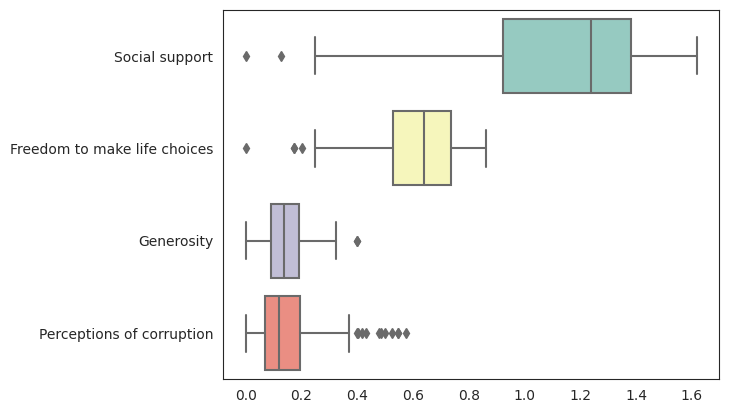

In [75]:
# distribution of Social support,Freedom to make life choices,Generosity,Perceptions of corruption
list_features = ['Social support','Freedom to make life choices','Generosity','Perceptions of corruption']
sns.boxplot(data=df.loc[:,list_features],orient='h',palette = 'Set3')
plt.show()

- **Social Support:** Generally high across most countries, with some variability and notable outliers indicating extremes in social support.

- **Freedom to Make Life Choices:** Shows a moderate range of values, with some countries experiencing significantly more or less freedom.

- **Generosity:** Displays a narrower range, with some countries having notably lower generosity scores.

- **Perceptions of Corruption:** Generally low scores, indicating higher perceived corruption in many countries, with several countries standing out as having particularly high perceptions of corruption.

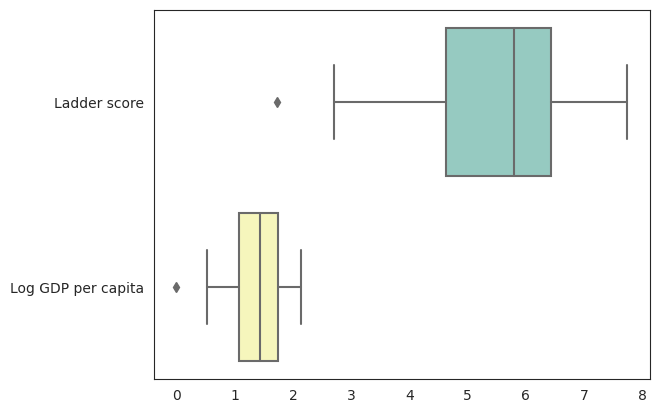

In [76]:
# distribution of Ladder score and Logged GDP per capita
list_features = ['Ladder score','Log GDP per capita']
sns.boxplot(data=df.loc[:,list_features],orient='h',palette = 'Set3')
plt.show()

- **Ladder Score:** The distribution shows a wide range of happiness scores, with the majority of countries having scores between 4.5 and 6.5. The presence of outliers indicates that some countries are significantly happier or less happy than the average.
- **Log GDP per Capita:** The distribution indicates economic disparity. The outliers suggest that some countries have significantly lower GDP per capita.

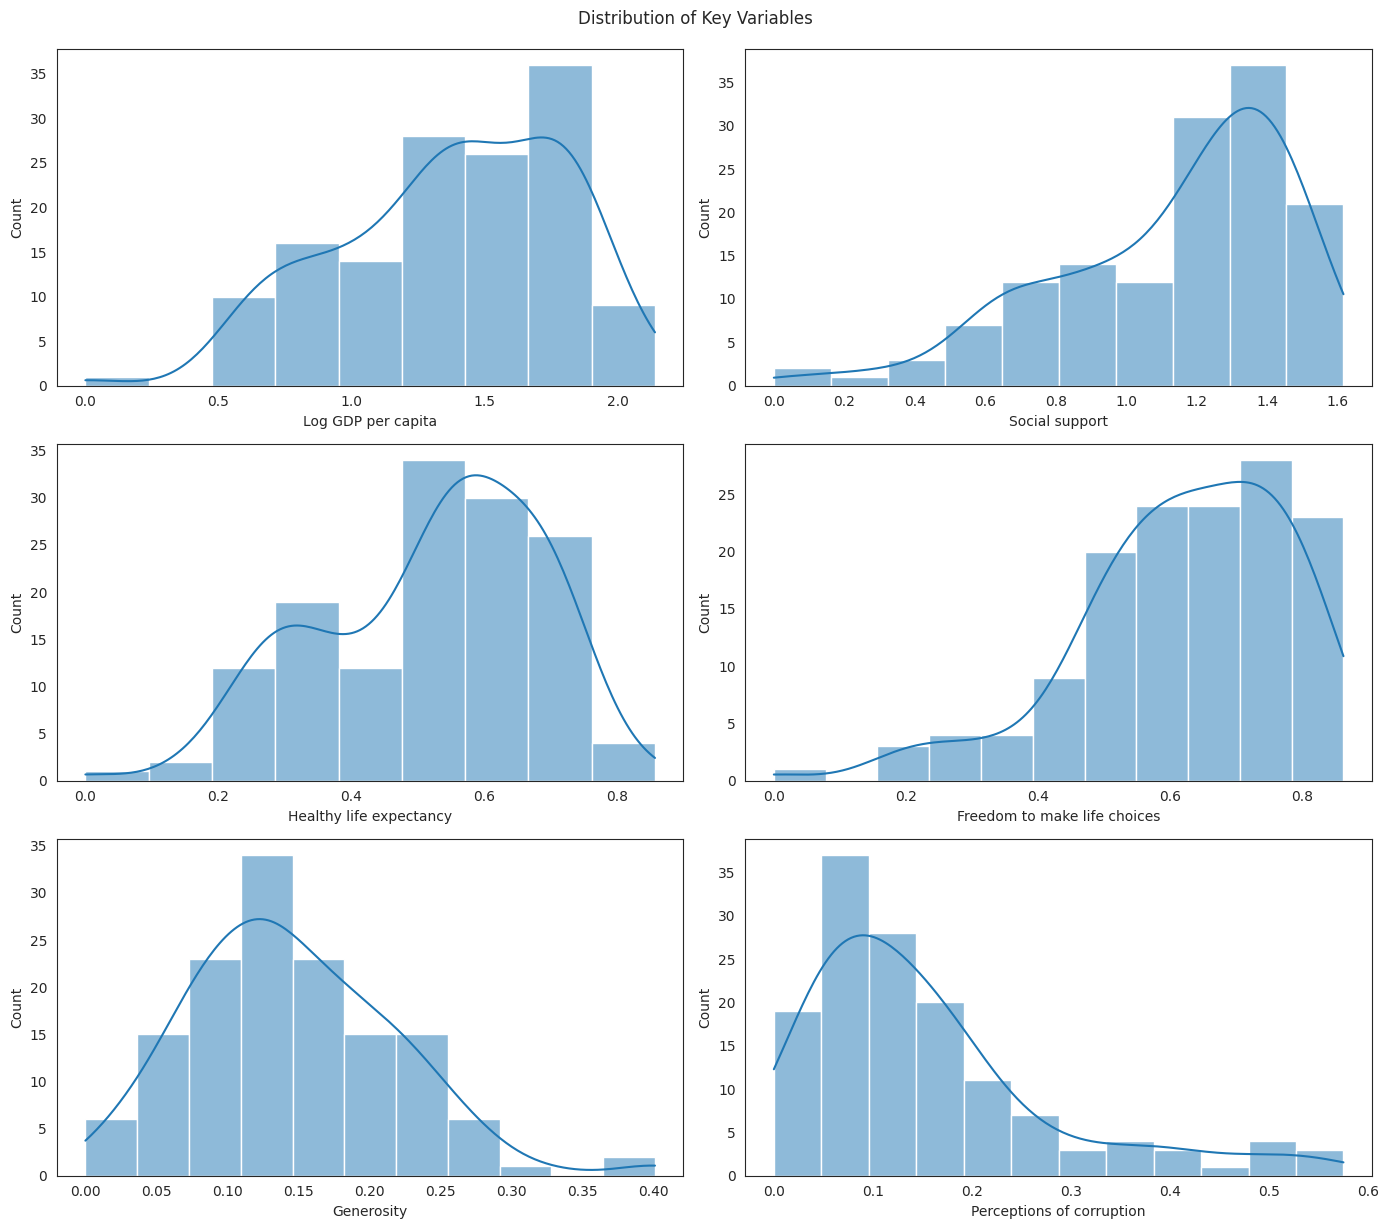

In [77]:
# Distribution plots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
sns.histplot(df['Log GDP per capita'], kde=True, ax=axes[0, 0])
sns.histplot(df['Social support'], kde=True, ax=axes[0, 1])
sns.histplot(df['Healthy life expectancy'], kde=True, ax=axes[1, 0])
sns.histplot(df['Freedom to make life choices'], kde=True, ax=axes[1, 1])
sns.histplot(df['Generosity'], kde=True, ax=axes[2, 0])
sns.histplot(df['Perceptions of corruption'], kde=True, ax=axes[2, 1])
plt.tight_layout()
plt.suptitle('Distribution of Key Variables', y=1.02)
plt.show()


- **Log GDP per Capita**: Indicates economic disparity, with most countries having moderate to high GDP per capita.

- **Social Support**: Generally high across most countries, reflecting strong social networks.

- **Healthy Life Expectancy**: High in many countries, indicating good health conditions.

- **Freedom to Make Life Choices**: Fairly balanced, with most countries having moderate levels of freedom.
- **Generosity**: Generally low, with a few exceptions.
- **Perceptions of Corruption**: Highly variable, with significant differences in how corruption is perceived across countries.


## Regional Indicator Counts

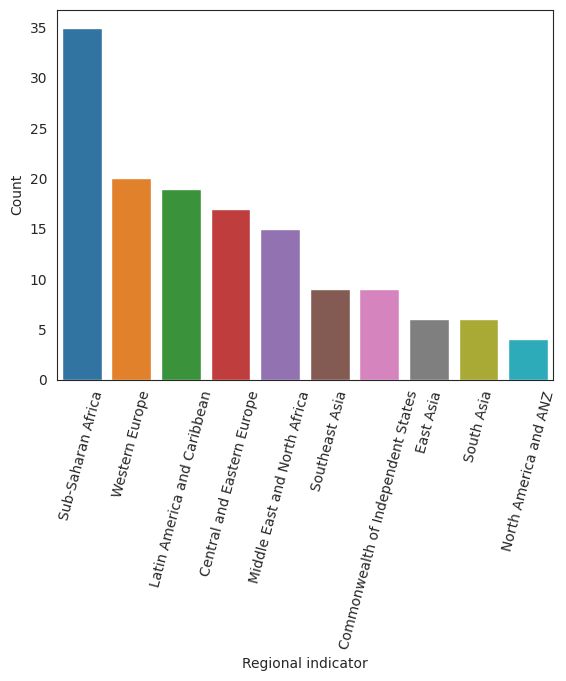

In [78]:
#count regional indicator
regional_counts = df["Regional indicator"].value_counts().reset_index()
regional_counts.columns = ["Regional indicator", "Count"]

sns.barplot(data = regional_counts, x = "Regional indicator", y = "Count")
plt.xticks(rotation = 75)
plt.show()

**This Bar graph shows how many countries are there in each region**

## Plot between Happiness score and GDP

Text(0.5, 1.0, 'Happiest and Unhappiest Countries in 2024')

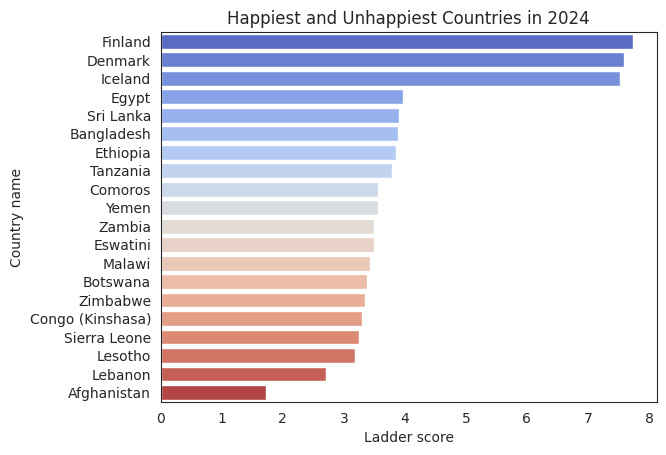

In [79]:
df_happiest_unhappiest = df[(df.loc[:,"Ladder score"] > 7.5) | (df.loc[:,"Ladder score"] < 4)]
sns.barplot(x = "Ladder score", y = "Country name", data = df_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2024")

**From this analysis, we can infer that Western European countries tend to be happier than other regions**

## Ladder Score Distribution by Regional Indicator

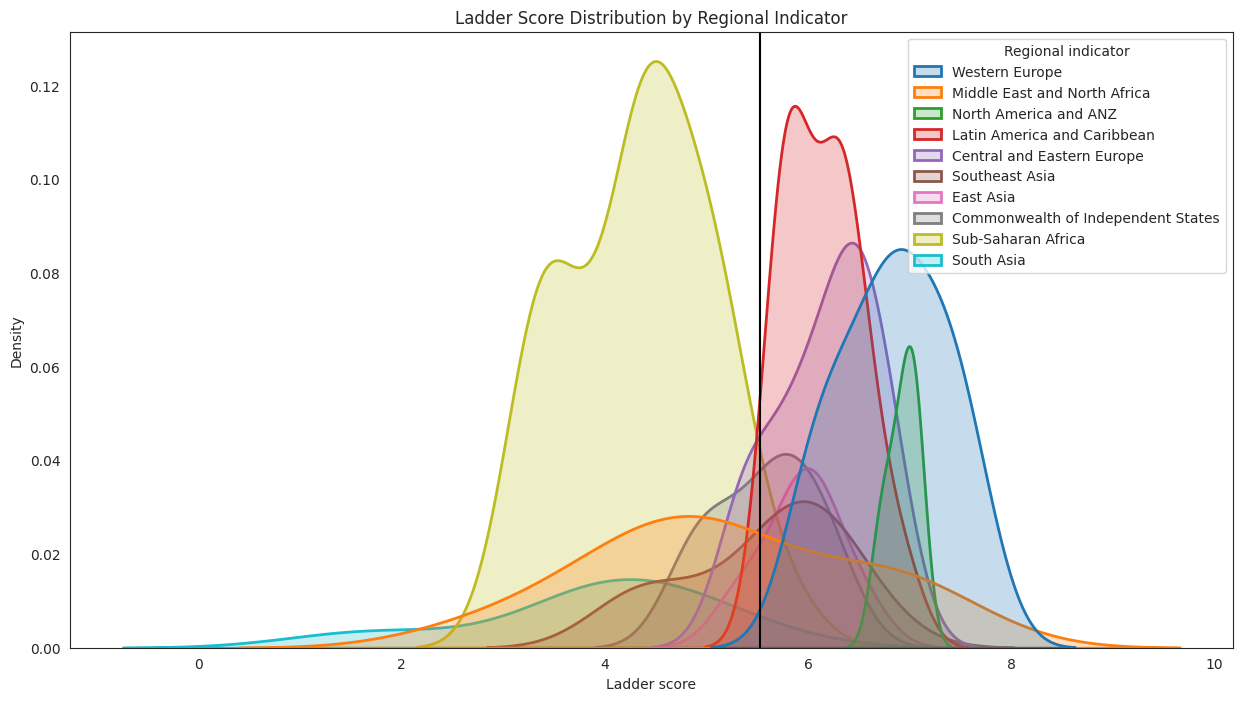

In [80]:
plt.figure(figsize = (15,8))
sns.kdeplot(x=df['Ladder score'], hue = df['Regional indicator'], fill = True, linewidth = 2)
plt.axvline(df['Ladder score'].mean(),c= 'black')
plt.title('Ladder Score Distribution by Regional Indicator')
plt.show()

**According to the chart, happiness levels are low in the African region and South Asia, while Western Europe exhibits high happiness rates. This observation aligns with the inference drawn from the previous graph, further supporting our conclusion.**

## Ladder Score Distribution by Country Indicator

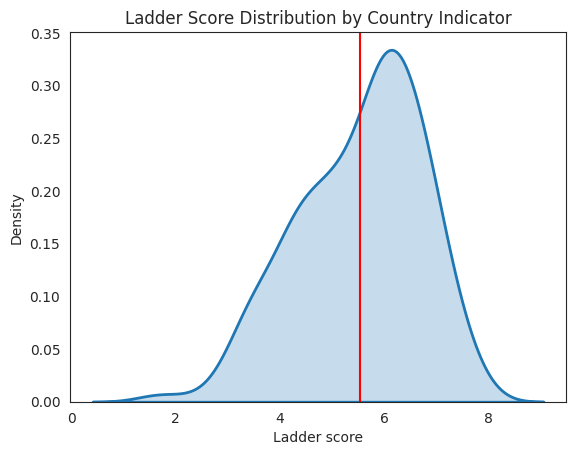

In [81]:
sns.kdeplot(df["Ladder score"],fill = True, linewidth = 2)
plt.axvline(df["Ladder score"].mean(), c = "red")
plt.title("Ladder Score Distribution by Country Indicator")
plt.show()

**From the above graph, It is concluded that average ladder score lies at 5.5**

## Most Generous and Most Ungenerous Countries in 2024

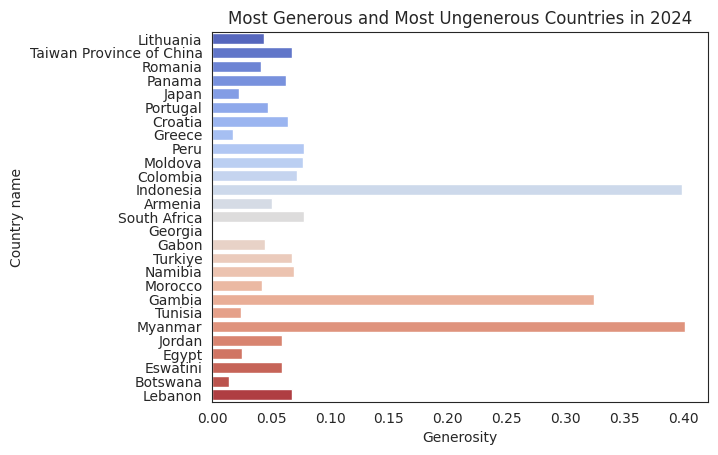

In [82]:
df_generous = df[(df.loc[:,"Generosity"] > 0.3) | (df.loc[:,"Generosity"] < 0.08)]
sns.barplot(x = "Generosity", y = "Country name", data = df_generous, palette = "coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2024")
plt.show()

**This graph highlights the distribution of generosity scores, showing a clear distinction between the most generous and least generous countries.**

## Generosity Distribution by Regional Indicator

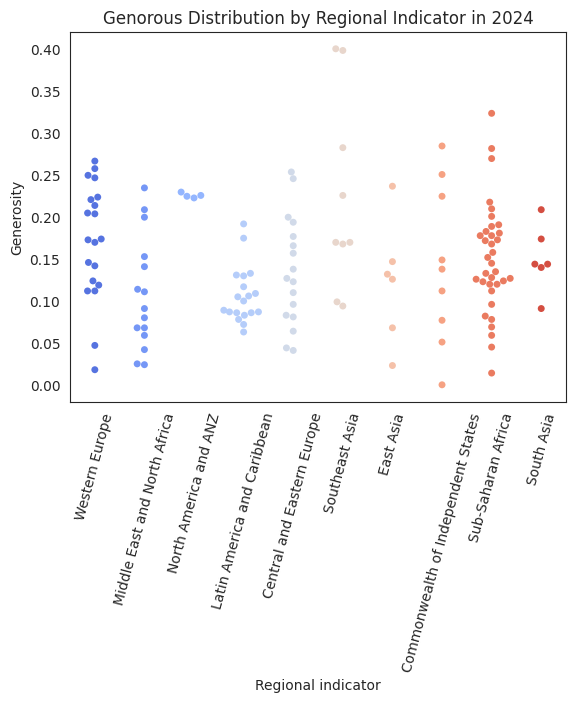

In [83]:
sns.swarmplot(x = "Regional indicator", y = "Generosity", data = df, palette = "coolwarm")
plt.xticks(rotation = 75)
plt.title("Genorous Distribution by Regional Indicator in 2024")
plt.show()

## Relationship Between Hapiness and Income

In [84]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(df, x='Log GDP per capita', y='Ladder score', 
                 title='Relationship Between Happiness and Income',
                 labels={'Log GDP per capita': 'GDP per Capita', 'Ladder score': 'Happiness Score'},
                 trendline='ols')  # Adding a trendline for better visualization

# Show the plot
fig.show()

- **The scatter plot shows a positive trend, indicating that as GDP per Capita increases, the Happiness Score also tends to increase.**
- **While the general trend is positive, there is variability in happiness scores among countries with similar GDP per Capita, indicating that other factors also contribute to happiness.**

## Relationship Between Hapiness and Freedom

In [85]:
import plotly.express as px

# Create a bubble chart
fig = px.scatter(df, x='Freedom to make life choices', y='Ladder score', 
                 size='Log GDP per capita', color='Regional indicator',
                 title='Relationship Between Happiness and Freedom',
                 labels={'Freedom to make life choices': 'Freedom', 'Ladder score': 'Happiness Score'},
                 hover_name='Country name', size_max=60)

# Show the plot
fig.show()

- **The Western European countries are clustered in the top right, it indicates that these countries generally have high happiness and freedom, and likely higher GDP per capita.**
- **Most of the Middle East and North Africa countries Freedom score is less than 0.5 and Hapiness score is below 6**


## Scatter Plot of Happiness and GDP

In [86]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(df, x='Log GDP per capita', y='Ladder score', 
                 color='Regional indicator', size='Social support', 
                 hover_name='Country name', title='Interactive Scatter Plot of Happiness and GDP')
fig.show()


- **Western European countries might cluster in the top right, indicating high happiness and high GDP per capita.**
- **Venezuela is outlier**

## Relationship Between Features

In [87]:
df_features = df[['Ladder score', 'Healthy life expectancy', "Log GDP per capita",'Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']]

In [88]:
df_features.corr()

,Ladder score,Healthy life expectancy,Log GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,0.759659,0.768504,0.813542,0.644451,0.130038,0.451829,0.533542
Healthy life expectancy,0.759659,1.000000,0.830256,0.706924,0.401082,0.007148,0.399026,0.051538
Log GDP per capita,0.768504,0.830256,1.000000,0.726843,0.414886,-0.059405,0.444227,-0.029118
Social support,0.813542,0.706924,0.726843,1.000000,0.484641,0.079466,0.250870,0.159484
Freedom to make life choices,0.644451,0.401082,0.414886,0.484641,1.000000,0.224323,0.344197,0.250792
Generosity,0.130038,0.007148,-0.059405,0.079466,0.224323,1.000000,0.172666,0.036423
Perceptions of corruption,0.451829,0.399026,0.444227,0.250870,0.344197,0.172666,1.000000,0.000964
Dystopia + residual,0.533542,0.051538,-0.029118,0.159484,0.250792,0.036423,0.000964,1.000000


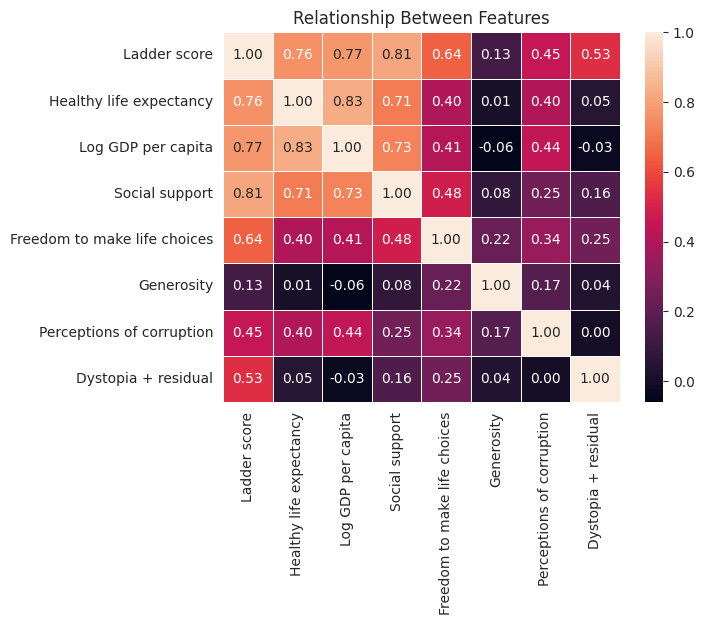

In [89]:
sns.heatmap(df_features.corr(), annot = True, fmt = ".2f", linewidth = 0.7) 
plt.title("Relationship Between Features")
plt.show()

- **Happiness (Ladder Score) is strongly influenced by economic factors (GDP per Capita), social factors (Social Support, Freedom to Make Life Choices), and health factors (Healthy Life Expectancy).**
- **Social Support is highly correlated with Healthy life expectacny and GDP Per capita.**
- **Generosity does not show strong correlations with other factors, suggesting it may be influenced by different dynamics.**